In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Origem: http://lib.stat.cmu.edu/datasets/boston

In [ ]:
FOLDERNAME = "PUC_Rio/ML/Boston_Housing"
%cd drive/MyDrive/$FOLDERNAME

/content/drive/MyDrive/PUC_Rio/ML/Boston_Housing


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install matplotlib-venn

In [ ]:
# nstalling pandas profiling (run only the first time, then comment out this line)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# from pandas_profiling import ProfileReport

### Data collection and analysis
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston)

In [ ]:
import requests

url = 'http://lib.stat.cmu.edu/datasets/boston'

response = requests.get(url)
data = response.text

print(data[:2000])

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [ ]:
data_list = []
for i in range(len(data_lines)):
  if i%2 == 1:
    row_string = data_lines[i-1] + data_lines[i]
    new_row = row_string.split()
    new_row = list(map(float, new_row))
    data_list.append(new_row)


In [ ]:
print(data_list)

In [ ]:
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BLACK", "LSTAT", "MEDV-Price"]


In [ ]:
df = pd.DataFrame(data_list, columns=col_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  BLACK       506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV-Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


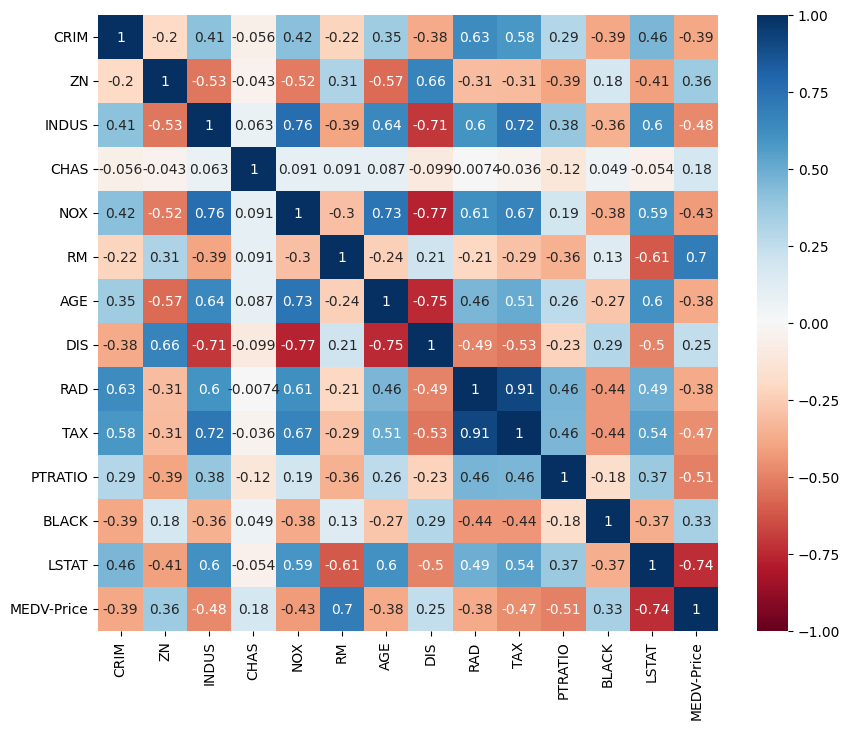

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

(354, 13) (354,) (152, 13) (152,)


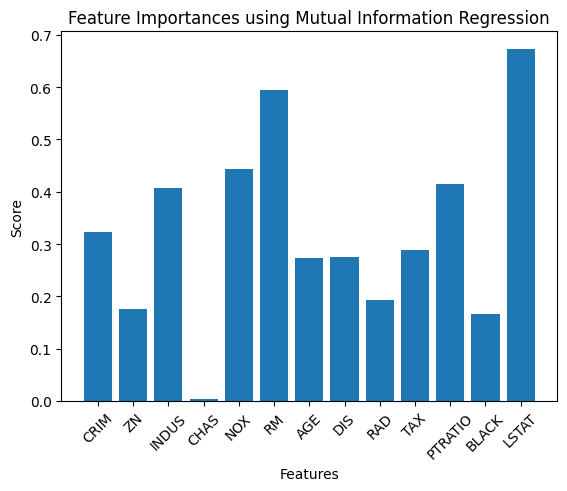

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

test_size = 0.2
seed = 7

x_t, x_val, y_t, y_val = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=seed)
print(x_t.shape, y_t.shape, x_val.shape, y_val.shape)

fs = SelectKBest(score_func=mutual_info_regression, k='all')

# learn relationship from training data
fs.fit(x_t, y_t)

# transform train input data
x_train_fs = fs.transform(x_t)

# transform test input data
x_val_fs = fs.transform(x_val)

plt.bar(df.columns[:-1], fs.scores_)
plt.title('Feature Importances using Mutual Information Regression')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()



In [ ]:
test_size = 0.3
df_x = df.drop('MEDV-Price', axis=1)
df_y = df['MEDV-Price']
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=test_size, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [ ]:
features_12 = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BLACK", "LSTAT"]
features_5 = ["INDUS", "RM", "TAX", "PTRATIO", "LSTAT"]


In [ ]:
train_12 = X_train[features_12]
test_12 = X_test[features_12]

train_5 = X_train[features_5]
test_5 = X_test[features_5]

In [ ]:
AdaBoostRegressor,
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=7)

# Global seed
np.random.seed(7)

models = []
# results = []
# names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('D-Tree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('XGB', XGBRegressor()))

# Defining parameters of base classifier for the BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 4

# Creating models for VotingRegressor
bases = []
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('d-tree', model2))
model3 = SVR()
bases.append(('svm', model3))

# Creating emsembles and add into models list
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('R-Forest', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

avaliação de modelos

In [ ]:
datas = [(train_12, Y_train), (train_5, Y_train)]

print(datas[0][0].shape)
print(datas[0][1].shape)
print(datas[1][0].shape)
print(datas[1][1].shape)

(354, 12)
(354,)
(354, 5)
(354,)


In [ ]:
train12_results = []
train12_names = []
train5_results = []
train5_names = []

### Poly Pipeline

In [ ]:
np.random.seed(7)


pipelines = []
pipelines.append(('R-Forest', Pipeline([
    ('normalization', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('r-forest', RandomForestRegressor())
])))
pipelines.append(('GBR', Pipeline([
    ('normalization', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('gbr', GradientBoostingRegressor(n_estimators=num_trees))
])))
pipelines.append(('XGB', Pipeline([
    ('normalization', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('xgb', XGBRegressor())
])))


In [ ]:
# Setting parameters
params = []

params.append(('R-Forest', {
    'r-forest__n_estimators': [30, 40, 50, 60],
    'r-forest__max_depth': range(3, 5),
    'r-forest__min_samples_leaf': range(2, 3),
    'r-forest__max_leaf_nodes': range(9, 13)}))

params.append(('GBR', {
    'gbr__n_estimators': [100, 200, 300],
    'gbr__max_depth': [3, 4, 5],
    'gbr__learning_rate': [0.01, 0.05, 0.1],
    'gbr__subsample': [0.8, 0.9, 1.0],
    'gbr__max_features': ['sqrt', 'log2', None]}))

params.append(('XGB', {
    'xgb__n_estimators': [4000, 5000, 7000],
    'xgb__max_depth': [2,3,4],
    'xgb__learning_rate': [0.009, 0.01, 0.02]}))


In [ ]:
# To get parameters according to model
def params_grid(name):
  for title, param in params:
    if title == name:
      return param

In [ ]:
from sklearn.model_selection import GridSearchCV
from joblib import dump

best_model_train12 = []
best_model_train5 = []

def grid_search(pipelines, x_train_nor, Y_train, is_12_features):
    for name, model in pipelines:     # name = R-Forest

        # estimator = Pipeline(steps=[('normalization', MinMaxScaler()), ('r-forest', RandomForestRegressor())])
        grid = GridSearchCV(estimator=model, param_grid=params_grid(name), scoring='neg_mean_squared_error', cv=kfold)
        grid.fit(x_train_nor, Y_train)

        print('%s - better: %f using %s' % (name, grid.best_score_, grid.best_params_))

        if is_12_features:
          # With 12 features
          best_model_train12.append(grid.best_estimator_)
          model_filename = f"best_model_train12_{name}.joblib"
        else:
          # With 5 features
          best_model_train5.append(grid.best_estimator_)
          model_filename = f"best_model_train5_{name}.joblib"


        dump(grid.best_estimator_, model_filename)
        print(f"Model saved as {model_filename}")

In [ ]:

def predict_and_plot(best_model, x_test, y_test, is_12_features):

    plt.figure(figsize=(10, len(best_model)*3))
    y_test_np = np.array(y_test)
    for i, estimator in enumerate(best_model):
        model_name = type(list(estimator.named_steps.values())[1]).__name__

        predictions = estimator.predict(x_test)
        validation_error = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(validation_error)
        print(f"{model_name}_RMSE - Validation Error: {rmse}")


        sorted_idx = np.argsort(y_test_np)
        sorted_y_test = y_test_np[sorted_idx]
        sorted_predictions = predictions[sorted_idx]

        # y_val
        # plt.subplot(nrows, ncols, index)
        plt.subplot(len(best_model), 1, i+1)
        plt.plot(sorted_y_test, color='b', label='Ture values')

        # predictions(red)
        plt.plot(sorted_predictions, color='r', label='Predictions')


        plt.title(f"{model_name} - True values X Predictions")
        plt.xlabel('Sample Index (Sorted by True Values)')
        plt.ylabel('Price (USD)')
        plt.legend()

    # space between subplots
    plt.tight_layout()

    plt.show()

Getting selected model better parameters performance while datas with 12 features:

R-Forest - better: -13.695071 using {'r-forest__max_depth': 4, 'r-forest__max_leaf_nodes': 12, 'r-forest__min_samples_leaf': 2, 'r-forest__n_estimators': 40}
Model saved as best_model_train12_R-Forest.joblib
GBR - better: -9.251005 using {'gbr__learning_rate': 0.05, 'gbr__max_depth': 5, 'gbr__max_features': 'sqrt', 'gbr__n_estimators': 300, 'gbr__subsample': 0.8}
Model saved as best_model_train12_GBR.joblib
XGB - better: -10.244968 using {'xgb__learning_rate': 0.01, 'xgb__max_depth': 4, 'xgb__n_estimators': 7000}
Model saved as best_model_train12_XGB.joblib

Validation Error while dataset with 12 features:

PolynomialFeatures_RMSE - Validation Error: 3.540887955131949
PolynomialFeatures_RMSE - Validation Error: 2.913835851217857
PolynomialFeatures_RMSE - Validation Error: 2.899190345788194


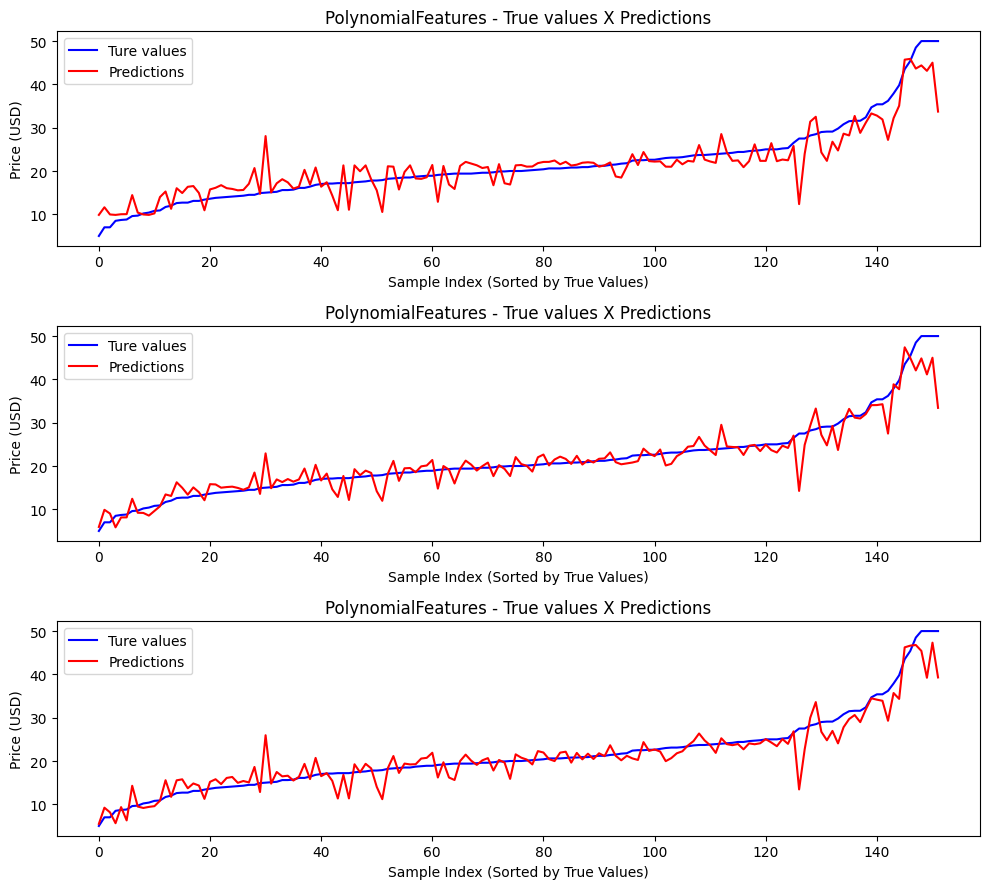

--------------------------------------------------
Getting selected model better parameters performance while datas with features without chas:

R-Forest - better: -15.269260 using {'r-forest__max_depth': 4, 'r-forest__max_leaf_nodes': 12, 'r-forest__min_samples_leaf': 2, 'r-forest__n_estimators': 30}
Model saved as best_model_train5_R-Forest.joblib
GBR - better: -11.767592 using {'gbr__learning_rate': 0.05, 'gbr__max_depth': 4, 'gbr__max_features': 'sqrt', 'gbr__n_estimators': 200, 'gbr__subsample': 1.0}
Model saved as best_model_train5_GBR.joblib
XGB - better: -13.728577 using {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 4000}
Model saved as best_model_train5_XGB.joblib

Validation Error while dataset without chas:

PolynomialFeatures_RMSE - Validation Error: 4.024908272203692
PolynomialFeatures_RMSE - Validation Error: 3.4127713326067
PolynomialFeatures_RMSE - Validation Error: 3.537456458964005


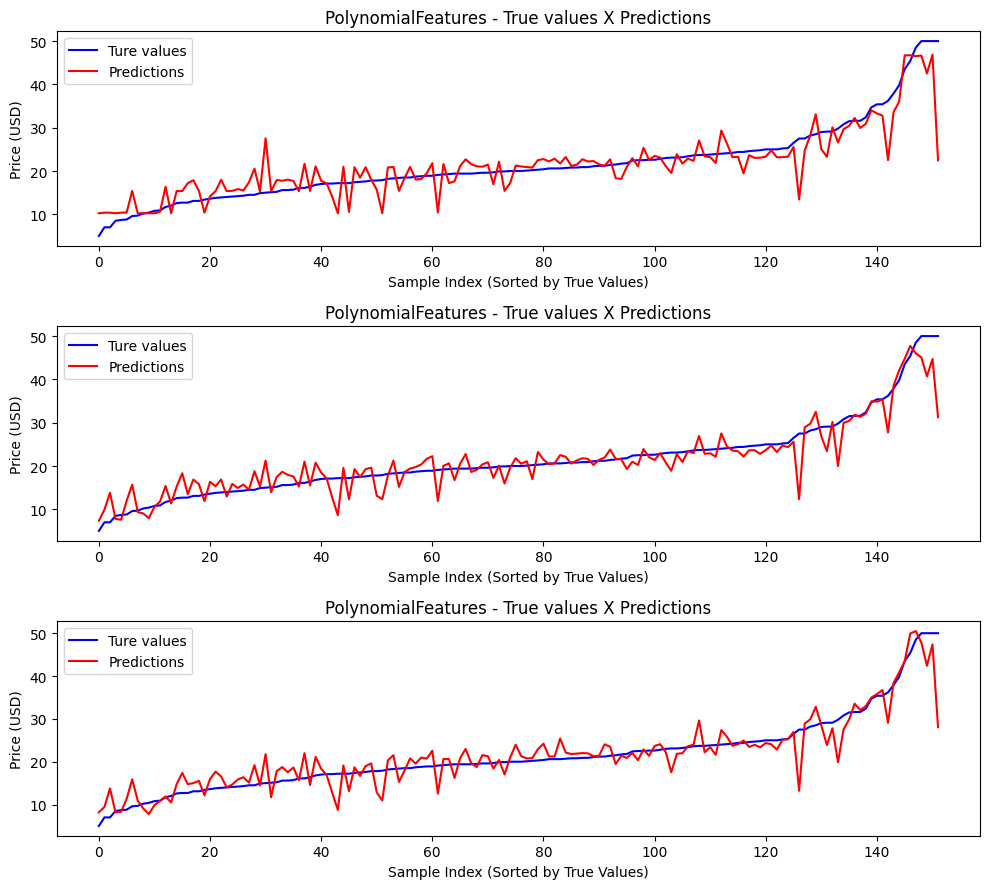

In [22]:
# Normalization
normalizer = MinMaxScaler()
datasets = [(train_12, Y_train, test_12, Y_test), (train_5, Y_train, test_5, Y_test)]

for data in datasets:

    x_train_nor = normalizer.fit_transform(data[0])
    x_test_nor = normalizer.transform(data[2])

    if data[0].shape[1] == 12:

      is_12_features = True

      print('\033[91mGetting selected model better parameters performance while datas with 12 features:\033[0m\n')
      grid_search(pipelines, x_train_nor, Y_train, is_12_features)

      print()
      print('\033[91mValidation Error while dataset with 12 features:\033[0m\n')
      predict_and_plot(best_model_train12, x_test_nor, Y_test, is_12_features)
      print('-'*50)

    else:
      is_12_features = False

      print('\033[91mGetting selected model better parameters performance while datas with features without chas:\033[0m\n')
      grid_search(pipelines, x_train_nor, Y_train, is_12_features)

      print()
      print('\033[91mValidation Error while dataset without chas:\033[0m\n')
      predict_and_plot(best_model_train5, x_test_nor, Y_test, is_12_features)